# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.    
matplotlib을 이용해 그래프에 대한 설정을 추가로 할 수 있다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- **kind** : 그래프 종류 지정
    - **'line'**: line plot (default)
    - **'bar'**: vertical bar plot
    - **'barh'**: horizontal bar plot
    - **'hist'**: histogram
    - **'box'**: boxplot
    - **'kde'**: Kernel Density Estimation plot
    - **'pie'**: pie plot
    - **'scatter'**: scatter plot

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다. ==> 라벨로 사용

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

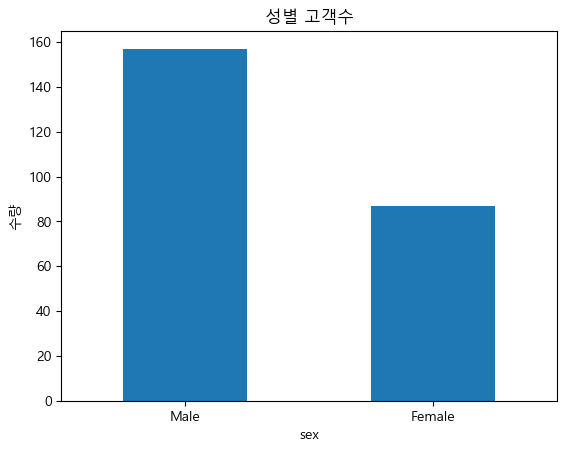

In [5]:
# 성별 고객수
v = tips['sex'].value_counts()
## Series값으로 그래프를 그릴 때 index name을 한축(x), 값을 다른 한축(y)에 놓는다.
v.plot(kind='bar') 

# pandas는 내부적으로 matplotlib 사용해서 그래프를 그린다.
# 그래서 추가 설정은 plot()의 파라미터로 전달  또는 matplotlib의 함수 사용할 수있다.
plt.title("성별 고객수")
plt.ylabel("수량")
plt.xticks(rotation=0)
plt.show()

In [ ]:
v.plot(kind='bar', title="성별 고객수", ylabel='개수', figsize=(5, 4))
plt.show()

In [ ]:
# 성별-흡연여부별 손님 수
result = tips.pivot_table(index="sex", columns="smoker", values="total_bill", aggfunc="count")
result

In [ ]:
# 하나의 값으로(series) 그래프를 그리는 함수.
## DataFrame.plot() => 컬럼별로 그린다.
result.plot(kind='bar')
plt.show()

In [ ]:
result.plot(
    kind='bar', 
    stacked=True #  막대: 전체 개수, smoker 별 비율로 나눠줌.
)
plt.show()

In [ ]:
result = tips.pivot_table(index="smoker", columns='day', values='total_bill', aggfunc="sum")
result

In [ ]:
# result.plot(kind='bar')
result.plot(kind='bar', stacked=True, rot=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="요일")
plt.show()

## 파이차트

In [ ]:
tips['day'].value_counts().plot(
    kind='pie', autopct="%d%%",
    explode=[0.1, 0, 0, 0], shadow=True
)
plt.show()

## 히스토그램, KDE(밀도그래프)

In [ ]:
tips['total_bill'].plot(
    kind="hist", 
    bins=15, 
    edgecolor="k"
)
plt.show()

In [ ]:
tips['total_bill'].plot(kind="kde") 
plt.xlim(0, 55)
plt.show()

In [ ]:
tips[['tip', 'total_bill']].plot(kind='hist', alpha=0.7, bins=30)
plt.show()

## Boxplot (상자그래프)

In [ ]:
tips['total_bill'].plot(kind="box", figsize=(4, 3))
plt.show()

In [ ]:
tips['total_bill'].plot(kind="box", whis=0.5, figsize=(4, 3))
plt.show()

In [ ]:
tips[['tip', 'total_bill']].plot(kind="box")
plt.show()

## scatter plot (산점도) 

In [ ]:
tips.plot(kind="scatter", x="tip", y="total_bill", alpha=0.2)
plt.show()

In [ ]:
tips[['tip', 'total_bill']].corr()

In [ ]:
dia = pd.read_csv("data/diamonds.csv")
v = dia.select_dtypes(include="number").corr()
v

In [ ]:
plt.imshow(v)#, cmap="Blues")
plt.colorbar()
plt.show()

In [ ]:
# plt.imshow() : 원래 기능 - 이미지출력
from PIL import Image
import numpy as np
img = np.array(Image.open("image.jpg"))
plt.imshow(img)
plt.show()

# line plot

In [ ]:
df = pd.read_excel("data/강수량.xlsx", index_col="계절").T
df

In [ ]:
df['봄'].plot(figsize=(15, 4), marker="o")
plt.show()

In [ ]:
df.plot(figsize=(15,4))
plt.show()

In [ ]:
df.T

In [ ]:
df.T.plot()
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="년도", ncols=2) # 2개 열로 나눠서.
plt.show()